## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [11]:
import numpy as np

### Load and normalize our data

In [12]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


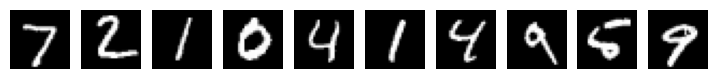

In [13]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [14]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 12s 21ms/step - loss: 0.1780 - val_loss: 0.1203
Epoch 2/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1106 - val_loss: 0.1007
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0978 - val_loss: 0.0936
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0919 - val_loss: 0.0886
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0856 - val_loss: 0.0837
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0838 - val_loss: 0.0829
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0823 - val_loss: 0.0813
Epoch 9/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0812 - val_loss: 0.0807
Epoch 10/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0802 -

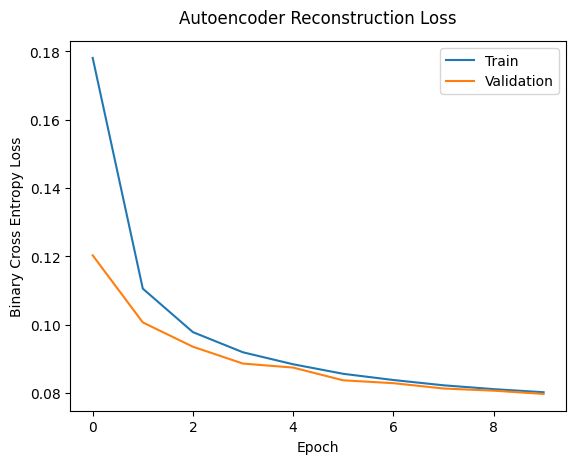

In [16]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 4ms/step


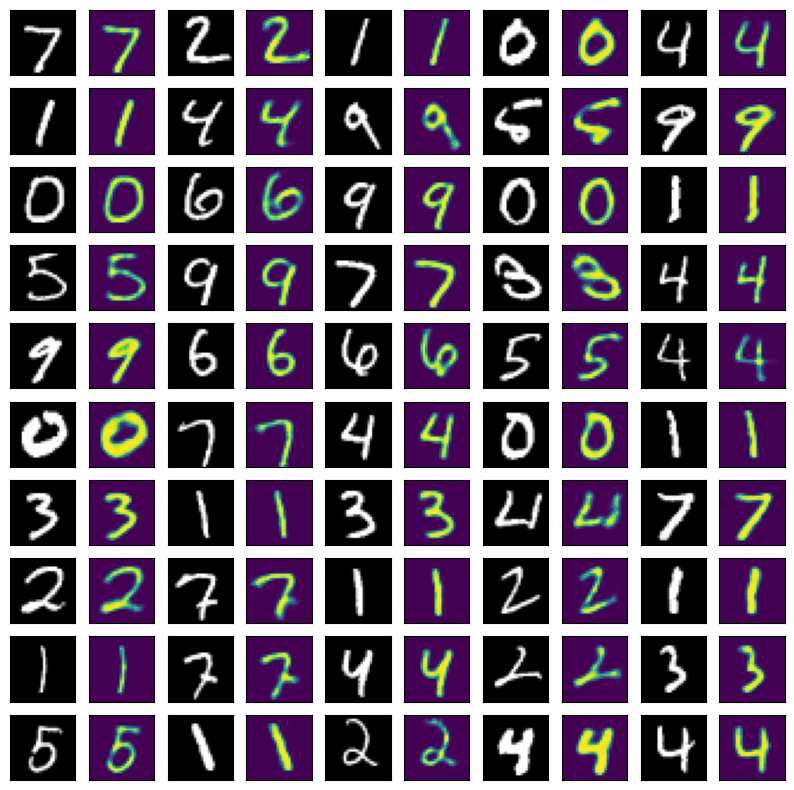

In [17]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [18]:
autoencoder.save('initially_trained_autoencoder.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 24ms/step
(1, 784)


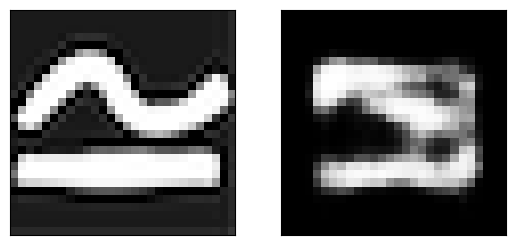

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

 By decreasing the bottleneck from 16 to 6 does the job it had an impact on  both image resolutions where the resolution has increased when it had the less bottleneck . When we tried to increase the bottleneck value from 6 to 100 the resolution of the images and pixels had an huge impact , pixels changed there size compared to previous one and became a bit smaller and also the image is not better and clear than previous one this is all happened because it overfits the model. So, having the less number of bottleneck will help the model to perform better.